# Topic Modeling of Hotel Reviews using Latent Dirichlet Allocation (LDA)
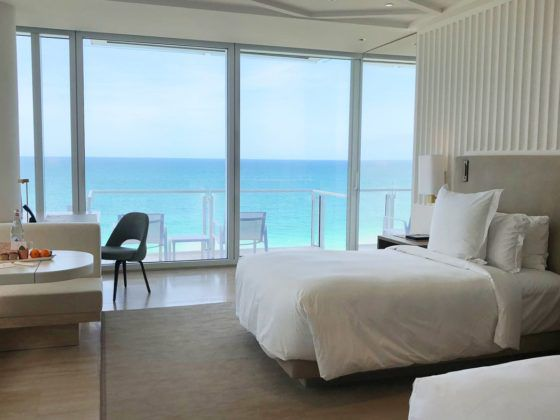

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.corpus import stopwords 
from nltk import word_tokenize,sent_tokenize 
from nltk.stem import WordNetLemmatizer  
from sklearn.decomposition import TruncatedSVD

stop_words=set(nltk.corpus.stopwords.words('english'))

# Reading the Dataset

In [2]:
data_raw = pd.read_csv('tripadvisor_hotel_reviews.csv')

In [3]:
data_raw.head(10)

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5
5,love monaco staff husband stayed hotel crazy w...,5
6,"cozy stay rainy city, husband spent 7 nights m...",5
7,"excellent staff, housekeeping quality hotel ch...",4
8,"hotel stayed hotel monaco cruise, rooms genero...",5
9,excellent stayed hotel monaco past w/e delight...,5


In [4]:
data_raw.columns

Index(['Review', 'Rating'], dtype='object')

# Data Cleaning

<AxesSubplot:>

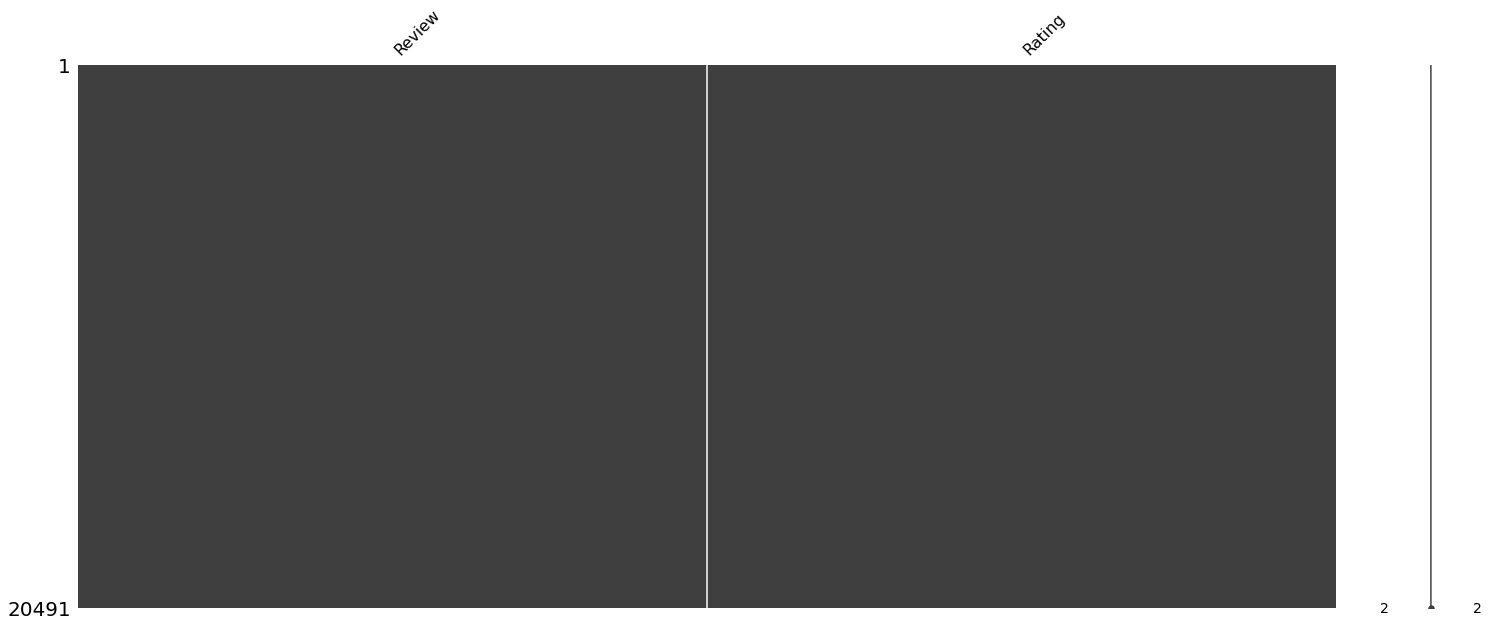

In [5]:
import missingno as m
m.matrix(data_raw)

In [6]:
data_raw = data_raw.drop(columns='Rating')

# Removing Integer numbers from dataset

In [7]:
data_raw['Review'] = data_raw['Review'].str.replace('\d+', '')

In [8]:
data_raw['Review'] = data_raw['Review'].str.replace('_', '')

# Tokenization and Lemmatization

In [9]:
def text_cleaning(text):
    le=WordNetLemmatizer()
    word_tokens=word_tokenize(text)
    tokens=[le.lemmatize(w) for w in word_tokens if w not in stop_words and len(w)>3]
    cleaned_text=" ".join(tokens)
    return cleaned_text

# Making a new dataframe to store

In [10]:
new = pd.DataFrame()

# Storing the cleaned text

In [11]:
new['cleaned_text']=data_raw['Review'].apply(text_cleaning)

In [12]:
new

,cleaned_text
0,nice hotel expensive parking good deal stay ho...
1,nothing special charge diamond member hilton d...
2,nice room experience hotel monaco seattle good...
3,unique great stay wonderful time hotel monaco ...
4,great stay great stay went seahawk game awesom...
...,...
20486,best kept secret time staying charm -star beat...
20487,great location price view hotel great quick pl...
20488,look nice modern outside desk staff particular...
20489,hotel theft ruined vacation hotel opened sept ...


# Adding the clean text into raw_dataset

In [13]:
data_raw['Cleaned_text'] = new['cleaned_text']


In [14]:
data_raw.head()

,Review,Cleaned_text
0,nice hotel expensive parking got good deal sta...,nice hotel expensive parking good deal stay ho...
1,ok nothing special charge diamond member hilto...,nothing special charge diamond member hilton d...
2,nice rooms not * experience hotel monaco seatt...,nice room experience hotel monaco seattle good...
3,"unique, great stay, wonderful time hotel monac...",unique great stay wonderful time hotel monaco ...
4,"great stay great stay, went seahawk game aweso...",great stay great stay went seahawk game awesom...


# TF-IDF Vectorizer

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
vect =TfidfVectorizer(stop_words=stop_words)

# Fitting the cleaned text into TF-IDF

In [16]:
vect_text=vect.fit_transform(new['cleaned_text'])

# Got feature names from TF-IDF

In [17]:
print(vect.get_feature_names())

['aaa', 'aaaa', 'aaaaa', 'aaaaaaaaa', 'aaaaaaaaaaaaaaa', 'aaaare', 'aaah', 'aaahhh', 'aadvantage', 'aahh', 'aalders', 'aand', 'aany', 'aaron', 'aarp', 'aarrgh', 'aavacations', 'abac', 'aback', 'abaited', 'abalone', 'abandon', 'abandoned', 'abandoning', 'abatement', 'abba', 'abbaye', 'abbelouie', 'abberation', 'abbey', 'abbot', 'abbott', 'abbreviated', 'abby', 'abderahim', 'abdication', 'abdomen', 'abdominal', 'abdulaziz', 'abeautiful', 'abel', 'aber', 'abercrombie', 'aberdeen', 'abessess', 'abetter', 'abian', 'abide', 'abiding', 'abigail', 'ability', 'abis', 'abit', 'ablast', 'able', 'abled', 'ableto', 'abnormal', 'aboard', 'abode', 'aboit', 'abolished', 'abolutely', 'abominable', 'abondon', 'abonoç', 'aboot', 'aboout', 'aboput', 'aboriginal', 'aborted', 'aboslutely', 'abosolutely', 'abosolutey', 'abosultely', 'abot', 'abottle', 'abou', 'abound', 'abounded', 'abounds', 'abouot', 'abour', 'abouta', 'aboutthe', 'abraham', 'abrahan', 'abrasion', 'abrasive', 'abreast', 'abroad', 'abrupt', 

In [18]:
vect_text.shape

(20491, 45909)

In [19]:
type(vect_text)

scipy.sparse.csr.csr_matrix

# Headlines Before Cleaning

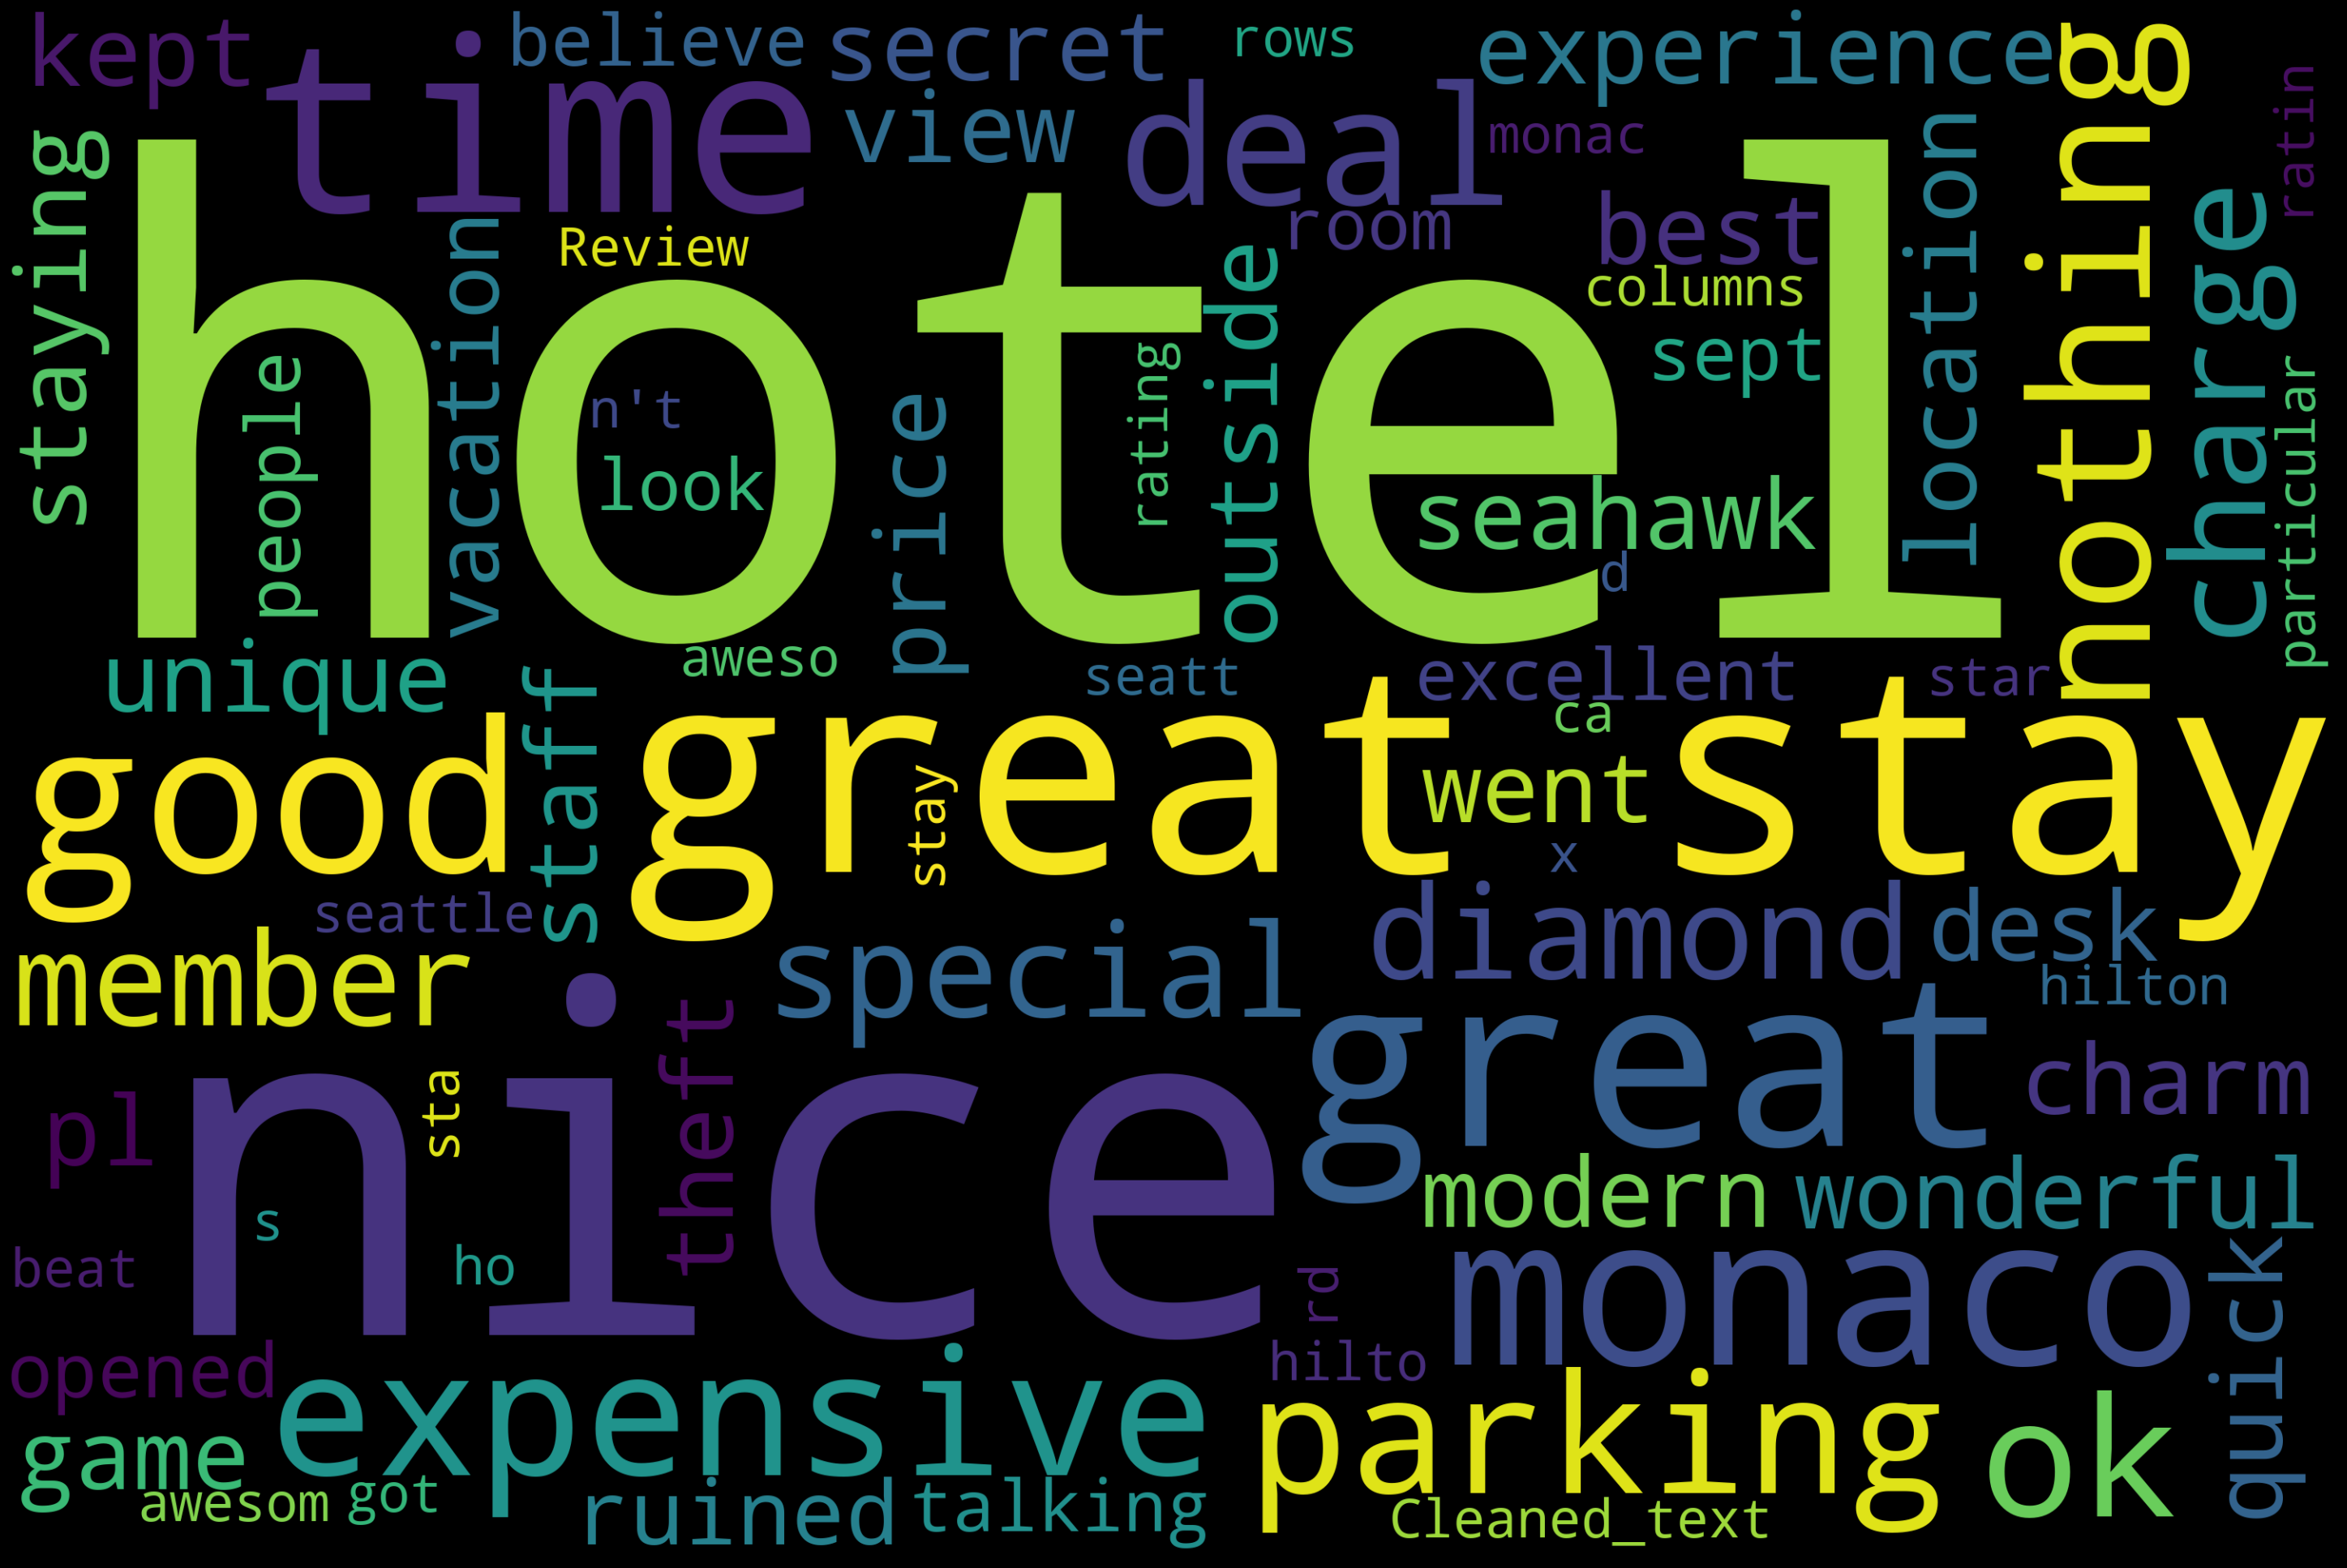

In [20]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
text = data_raw
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',    
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

# Headlines After Cleaning

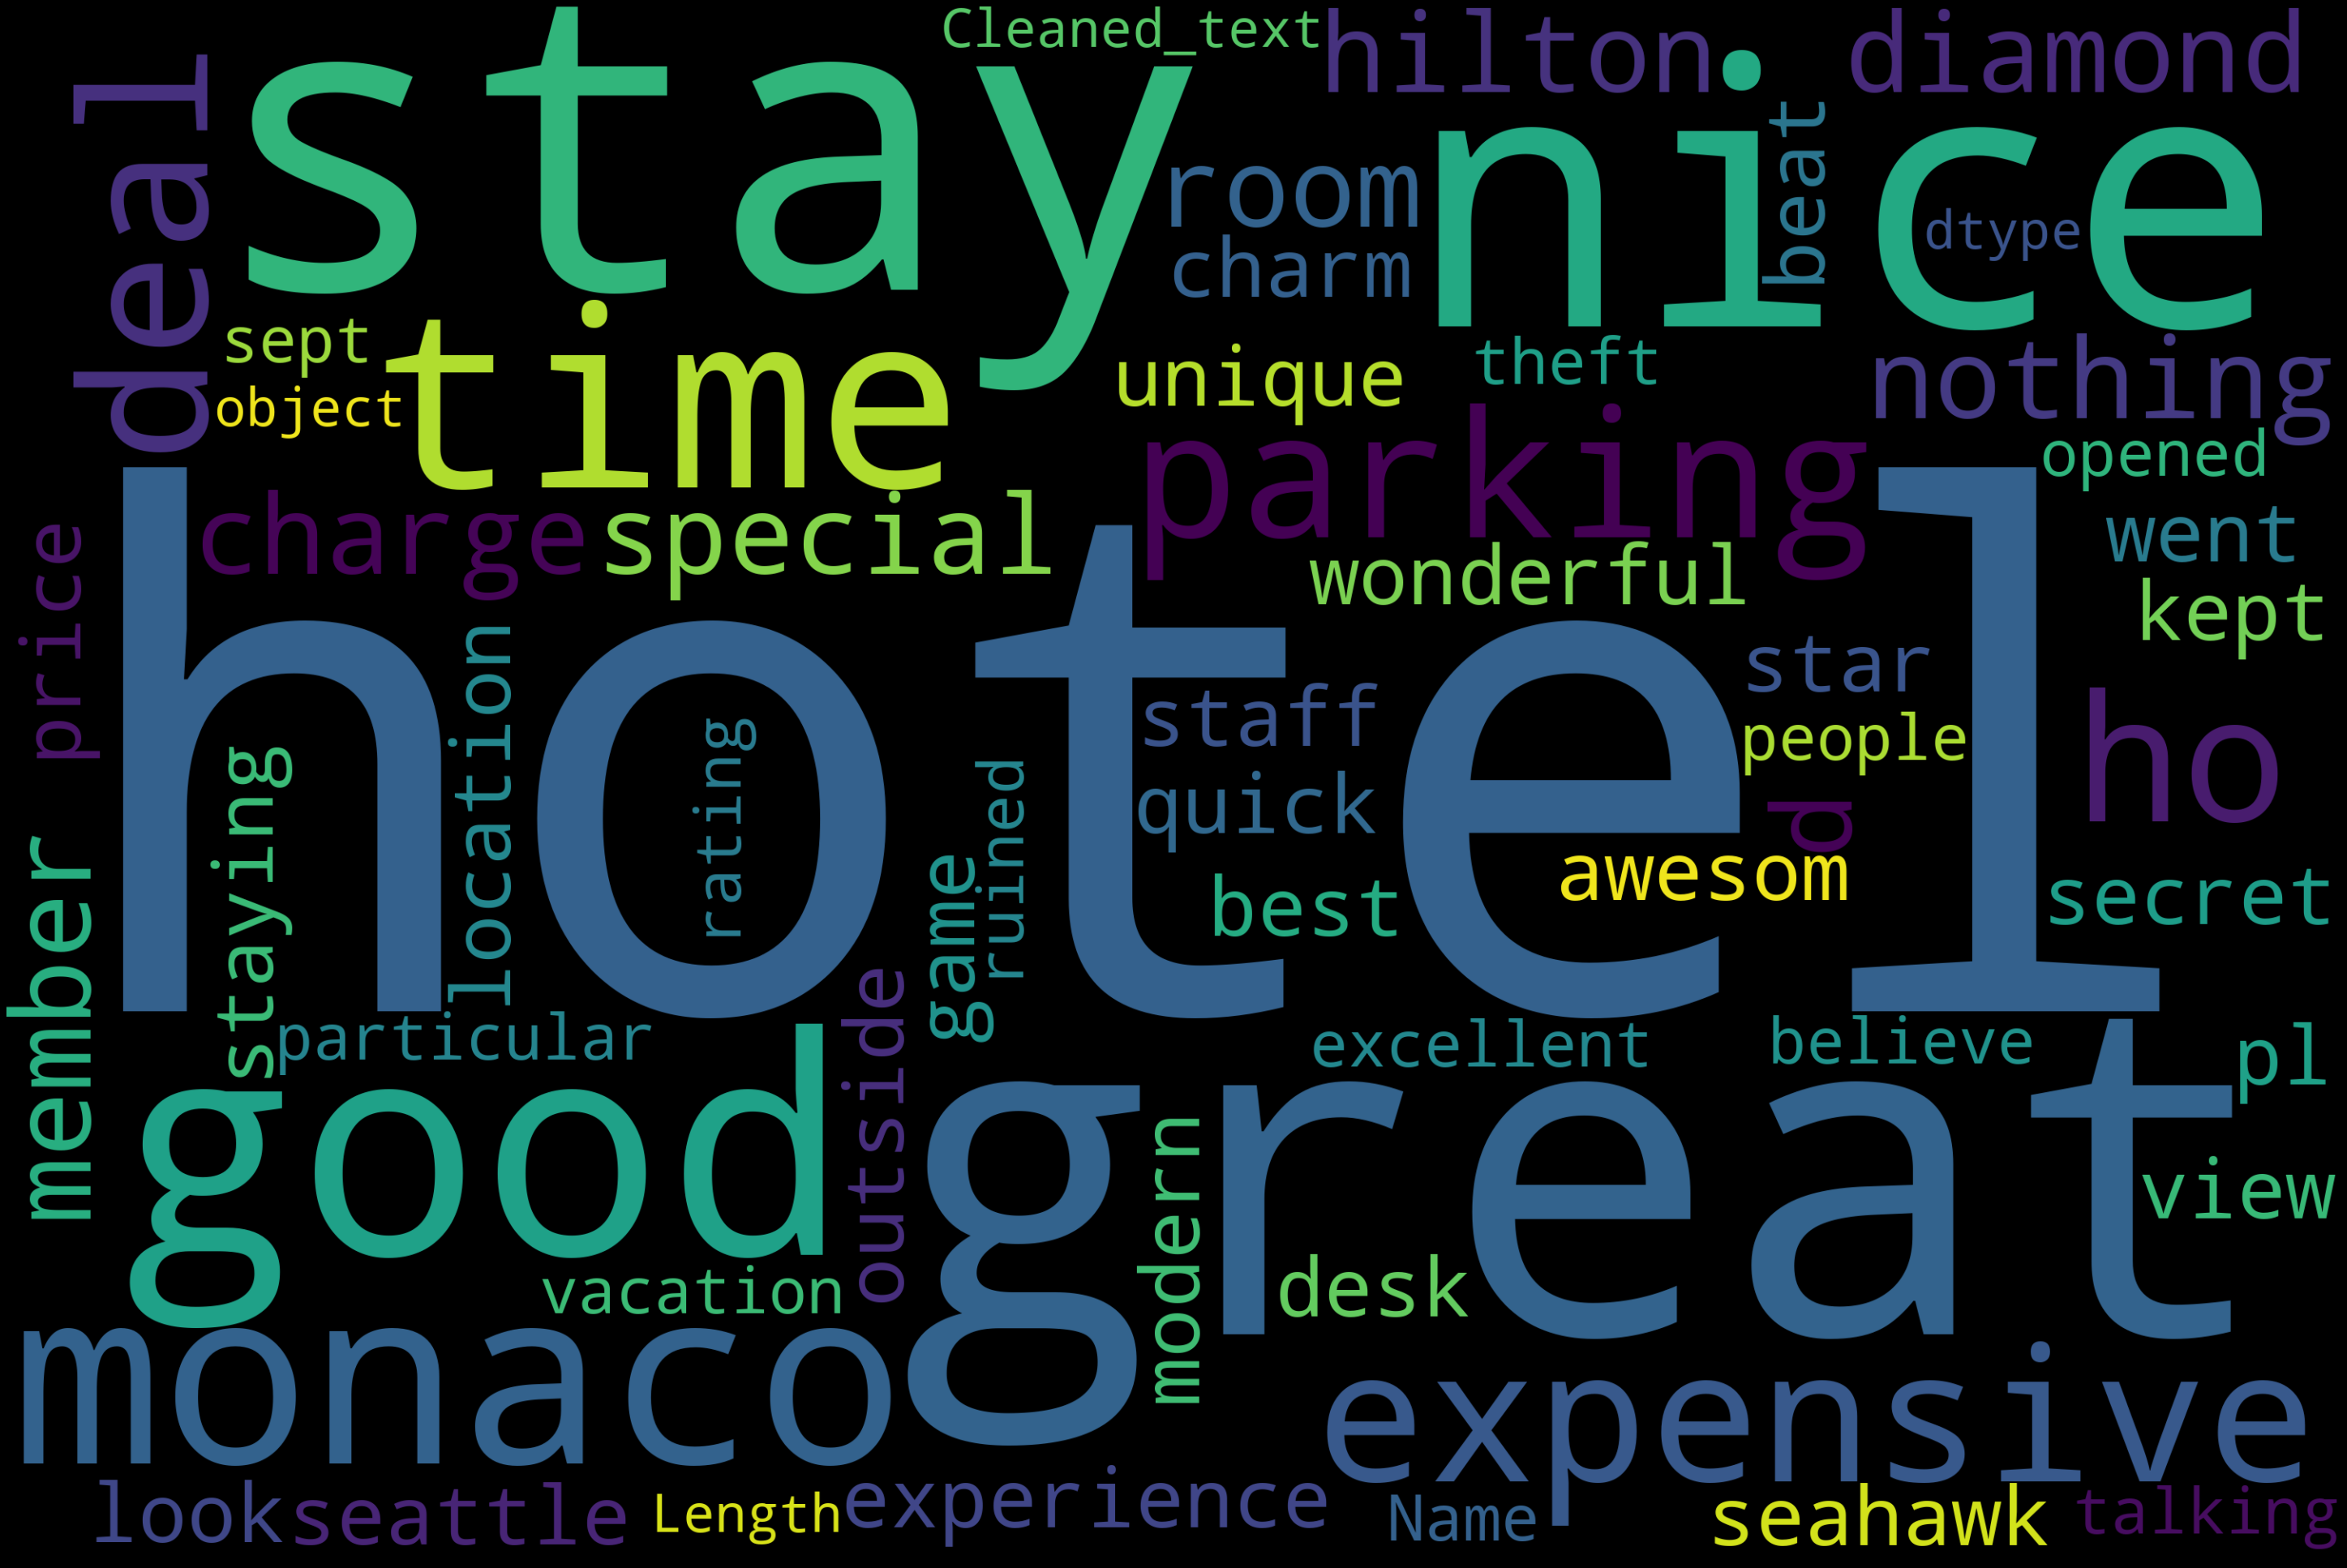

In [21]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
text = data_raw.Cleaned_text
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',    
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

# Topic Modeling

# LDA - Latent Dirichlet Allocation

In [22]:
from sklearn.decomposition import LatentDirichletAllocation
lda_model = LatentDirichletAllocation(n_components=20,learning_method='online',random_state=42,max_iter=1)
lda_top=lda_model.fit_transform(vect_text)

# Top LDA values

In [23]:
lda_top[0]

array([0.00586865, 0.00586865, 0.00586865, 0.00586865, 0.00586865,
       0.00586865, 0.00586865, 0.00586865, 0.00586865, 0.00586865,
       0.88849561, 0.00586865, 0.00586865, 0.00586865, 0.00586865,
       0.00586865, 0.00586865, 0.00586865, 0.00586865, 0.00586865])

In [24]:
names = ["1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12", "13", "14", "15", "16", "17", "18", "19", "20"]

<BarContainer object of 20 artists>

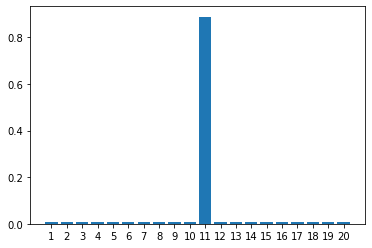

In [25]:
import matplotlib.pyplot as plt
plt.bar(names,lda_top[0])

In [26]:
lda_top.shape

(20491, 20)

In [27]:
lda_top[0].sort()

In [28]:
l=lda_top[0]
print("Top LDA Values : ")
for i,topic in enumerate(l):
    print("Topic ",i+1," : ",topic*100)

Top LDA Values : 
Topic  1  :  0.586865191655116
Topic  2  :  0.586865191655116
Topic  3  :  0.586865191655116
Topic  4  :  0.586865191655116
Topic  5  :  0.586865191655116
Topic  6  :  0.586865191655116
Topic  7  :  0.586865191655116
Topic  8  :  0.586865191655116
Topic  9  :  0.586865191655116
Topic  10  :  0.586865191655116
Topic  11  :  0.586865191655116
Topic  12  :  0.586865191655116
Topic  13  :  0.586865191655116
Topic  14  :  0.586865191655116
Topic  15  :  0.586865191655116
Topic  16  :  0.586865191655116
Topic  17  :  0.586865191655116
Topic  18  :  0.586865191655116
Topic  19  :  0.5868651916551161
Topic  20  :  88.84956135855276


In [29]:
lda_model.components_.shape

(20, 45909)

In [30]:
lda_model.components_

array([[0.05010035, 0.05009389, 0.05009294, ..., 0.05010141, 0.05009199,
        0.05007808],
       [0.05008842, 0.05009349, 0.05010567, ..., 0.05011233, 0.05009237,
        0.05009107],
       [0.0500845 , 0.05008842, 0.0501061 , ..., 0.05010296, 0.05009747,
        0.05011119],
       ...,
       [0.0500981 , 0.05010141, 0.05010712, ..., 0.05009483, 0.05008189,
        0.05009933],
       [0.05009523, 0.42783238, 0.05008036, ..., 0.05009647, 0.05010483,
        0.05010555],
       [0.05009927, 0.0501001 , 0.05007865, ..., 0.05011549, 0.05009619,
        0.05007935]])

# Top 20 Topic List 

In [31]:
vocab = vect.get_feature_names()

for i, comp in enumerate(lda_model.components_):
    vocab_comp = zip(vocab, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:10]
    print("Topic "+str(i+1)+": ")
    for t in sorted_words:
        print(t[0],end=" ")
    print("\n")

Topic 1: 
marco elite shanti aswell yuan suburb pantheon malaysia innovative serivce 

Topic 2: 
larry plage advisable resevation wantied aretwo antonella stowed comfortables wiev 

Topic 3: 
quietly rudest complement adsl unfinished diaper leadership usageservice madnessvery prat 

Topic 4: 
airconditioner faciltiesnice locationmake matchgreat superbhotel grunge litote troquet pridtine duvivierle 

Topic 5: 
forbidden hawker clarke axel subject indulgence sanitary ringing cayena positives 

Topic 6: 
soiled unkempt loooking paragliding skal masquerade conjure carpetting blockage relates 

Topic 7: 
ramada nelson helicopter talented mong swapped joseph stylist othere chanels 

Topic 8: 
coutyard granados goodlooking joost queensized uncirculated stipulates lhow tec plasterer 

Topic 9: 
funeral sari friends ueno winning chedi medici merce grimani dramatic 

Topic 10: 
roommate remarkably classify maneuver amrath intrude staggering anchor apprecaited chilledstaff 

Topic 11: 
hotel room